# Limpieza de datos

Vamos a aplicar el [checklist del Banco Mundial](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning) en Python usando 
el [SciPy stack](https://www.scipy.org/stackspec.html), principalmente pandas

## 0. Prerequisitos

Aclaración: La próxima celda es para compatilibidad con Colab, NO ES RECOMENDADO realizar pip install desde un notebook.

In [1]:
import sys
import pandas as pd 

in_colab = 'google.colab' in sys.modules

if in_colab:
    BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
    file_16 = BASE_DIR + '/input/kickstarter-projects/ks-projects-201612.csv'
    file_18 = BASE_DIR + '/input/kickstarter-projects/ks-projects-201801.csv'

else:
    BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
    file_16 = BASE_DIR + '/input/kickstarter-projects/ks-projects-201612.csv'
    file_18 = BASE_DIR + '/input/kickstarter-projects/ks-projects-201801.csv'

if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

You should consider upgrading via the '/home/sergio/.cache/pypoetry/virtualenvs/curacion-68F3RafI-py3.8/bin/python -m pip install --upgrade pip' command.



## 2. Pasos necesarios


In [3]:
#import pandas as pd
kickstarter_2018 = pd.read_csv(
    file_18,
    index_col='ID',
    parse_dates=['deadline','launched']
)

In [4]:
kickstarter_2018.describe(include='all', datetime_is_numeric=True)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,375764,159,15,14,NaN,NaN,NaN,NaN,6,NaN,23,NaN,NaN,NaN
top,New EP/Music Development,Product Design,Film & Video,USD,NaN,NaN,NaN,NaN,failed,NaN,US,NaN,NaN,NaN
freq,41,22314,63585,295365,NaN,NaN,NaN,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2014-11-01 16:04:27.950488832,4.908079e+04,2014-09-28 18:06:17.416520448,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
min,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,1.000000e-02,1970-01-01 01:00:00,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,NaN,NaN,NaN,NaN,2013-06-08 00:00:00,2.000000e+03,2013-05-07 22:14:27,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,NaN,NaN,NaN,NaN,2015-01-14 00:00:00,5.200000e+03,2014-12-10 03:23:41,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,NaN,NaN,NaN,NaN,2016-04-28 00:00:00,1.600000e+04,2016-03-24 10:21:09,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04
max,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,1.000000e+08,2018-01-02 15:02:31,2.033899e+07,NaN,219382.000000,NaN,2.033899e+07,2.033899e+07,1.663614e+08


### 2.1. Etiquetas de variables/columnas: no usar caracteres especiales



In [5]:
# helpful character encoding module
import chardet

¿Por qué? Por que aun hay limitaciones para trabajar con estos caracteres.

¿Cúales son los caracteres "normales"? 

In [6]:
import string

string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

¿Qué es ASCII? Es una de las primeras codificaciones (o encoding) disponibles. 
Ver https://en.wikipedia.org/wiki/ASCII

Un encoding es un mapa de caracteres a una representación en bits 
(por ejemplo 1000001). ASCII es uno de los primeros estandares para 
interoperatividad entre computadoras (antes cada fabricante de computadora usa 
su propia codificación), contempla sólo los caracteres ingleses y usa 7 bits, 
por ejemplo *1000001* codifica el caracter *A*

Cómo sólo representaban los caracteres ingleses, empiezan a aparecer variantes 
para distintos idiomas, Microsoft hizo los propios para internacionalizar 
Windows, hubo otro estandar ISO 8859, hasta que llegó el éstandar Unicode que 
hizo múltiples encodings pero cada uno contempla múltiples idiomas e incluso 
es extensible a futuro. UTF-8 es de esos encodings el más utilizado. 
Ver https://en.wikipedia.org/wiki/Unicode

En particular, Python 3 utiliza UTF-8 por defecto 
(lo que no sucedía en Python 2).

Veamos un ejemplo práctico

In [7]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [8]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

In [9]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [10]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


try to decode our bytes with the ascii encoding

```python
print(after.decode("ascii"))
---------------------------------------------------------------------------
UnicodeDecodeError                        Traceback (most recent call last)
<ipython-input-10-50fd8662e3ae> in <module>
      1 # try to decode our bytes with the ascii encoding
----> 2 print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)
```

In [11]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


Este error ya lo vimos...

```python
kickstarter_2016 = pd.read_csv("../input/ks-projects-201612.csv")
-----------------------------------------------------------------

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte
```
El error `UnicodeDecodeError` nos indica que el archivo no estaría en Unicode. 
Si no está en algún metadato o no fue indicado es dificil detectar el encoding, 
por suerte hay un paquete para esto en Python, que aplica unas heurísticas 
para detectar encoding.

In [14]:
!wget "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/input/kickstarter-projects/ks-projects-201612.csv" \
-P ../input/

--2020-12-28 15:34:05--  https://github.com/DiploDatos/AnalisisYCuracion/raw/master/input/kickstarter-projects/ks-projects-201612.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/kickstarter-projects/ks-projects-201612.csv [following]
--2020-12-28 15:34:06--  https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/kickstarter-projects/ks-projects-201612.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46500324 (44M) [text/plain]
Saving to: ‘../input/ks-projects-201612.csv’

k

In [15]:
DOWN_DIR = "../input/"
  
# look at the first ten thousand bytes to guess the character encoding
with open(DOWN_DIR + "/ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

Entonces le podemos indicar el encoding al leer el archivos

In [17]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv(
    "../input/ks-projects-201612.csv", encoding='Windows-1252', 
    low_memory=False)

# look at the first few lines
kickstarter_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Hay otro problema con los caracteres que es más sutíl: **[Mojibake](https://en.wikipedia.org/wiki/Mojibake)**

Sucede al leer UTF-8 como ASCII extendido (ie. `Windows-*`, `iso-8859-*` entre otros)

Ejemplo de mojibake:

In [18]:
"cigüeña".encode('utf-8').decode('iso-8859-1')

'cigÃ¼eÃ±a'

Para esto vamos a usar un módulo específico [ftfy](https://ftfy.readthedocs.io/en/latest/). 

Que nos permite ordenar cadenas por rareza

In [19]:
import ftfy.badness as bad

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1221990593,Support PMCD´s ¨From a Different Clay¨,Dance,Dance,USD,2011-06-08,1500.0,2011-04-28 05:15:32,1940.00,successful,27,US,1940.00,1940.00,1500.00,3
1234089244,Cracking (Mastering) the Metaphor (Political)...,Nonfiction,Publishing,USD,2013-10-27,30000.0,2013-09-27 23:33:29,0.00,failed,0,US,0.00,0.00,30000.00,2
124795481,µGALE (Canceled),Wearables,Technology,EUR,2015-04-17,18000.0,2015-02-16 01:55:34,10.00,canceled,2,NL,11.39,10.81,19465.14,2
1468489999,µCurrent GOLD - Precision Multimeter Current A...,Hardware,Technology,AUD,2013-12-31,9900.0,2013-12-17 10:28:09,116575.17,successful,1268,AU,104343.69,104871.51,8906.08,2
1610503461,µPeek - The Professional Microscope that Fits ...,Technology,Technology,CHF,2016-01-09,125000.0,2015-12-10 10:08:18,247688.14,successful,1435,CH,249249.19,246848.85,124576.44,2
16174550,PARALELO 19 Nº,Photography,Photography,MXN,2017-04-15,15000.0,2017-03-01 00:00:24,3340.00,failed,8,MX,0.00,177.36,796.52,2
1719215256,Kickstarter Gold: Manual Coffeemaker Nº3,Product Design,Design,USD,2017-07-22,60000.0,2017-06-20 15:29:56,68587.33,successful,618,US,21002.00,68587.33,60000.00,2
1837094178,¨Midgard's taigh-seinnse/ Eröffnung Mittelalte...,Restaurants,Food,CHF,2016-09-29,50000.0,2016-08-30 09:36:42,150.00,failed,1,CH,0.00,153.93,51310.47,2
2056123754,ZEIº - the most simple time tracking solution,Technology,Technology,EUR,2016-10-26,75000.0,2016-09-20 15:54:49,313637.00,successful,3140,AT,9451.58,342555.54,81915.29,2


Volviendo a la consigna original, chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

In [20]:
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index(['usd pledged'], dtype='object')

```python
kickstarter_2018.usd_pledged.head()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-16-82c7184671dd> in <module>
----> 1 kickstarter_2018.usd_pledged.head()

~/development/dipdata/curacion/cura/lib/python3.8/site-packages/pandas/core/generic.py in __getattr__(self, name)
   5272             if self._info_axis._can_hold_identifiers_and_holds_name(name):
   5273                 return self[name]
-> 5274             return object.__getattribute__(self, name)
   5275 
   5276     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'usd_pledged'
```

In [21]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.usd_pledged.head()

ID
1000002330       0.0
1000003930     100.0
1000004038     220.0
1000007540       1.0
1000011046    1283.0
Name: usd_pledged, dtype: float64

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos
al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [22]:
kick_code_18 = pd.read_csv(file_18, encoding='iso-8859-1')
kick_code_18.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [23]:
kick_code_18['name_weirdness'] = kick_code_18['name'].apply(weird)
kick_code_18[kick_code_18['name_weirdness'] > 1]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
63,1000235643,HIIT Bottleâ¢,Drinks,Food,USD,2015-04-27,15000.0,2015-03-13 18:33:08,124998.0,successful,2784,US,124998.00,124998.00,15000.00,2
70,1000260691,Gizbeeâ¢ Unlimited Removable Storage for Your...,Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.0,canceled,15,US,2030.00,2030.00,87000.00,2
123,1000519001,Wordwright: reÂ·deÂ·finÂ·ing word play,Tabletop Games,Games,USD,2015-12-29,2000.0,2015-11-21 14:12:27,14794.0,successful,624,US,14794.00,14794.00,2000.00,6
157,1000644119,OperaciÃ³n Douve,Action,Film & Video,EUR,2016-05-01,100.0,2016-03-02 19:09:05,20.0,failed,2,ES,21.77,22.85,114.27,2
184,1000767040,Strait Jacket â Tangle Prevention For Headph...,Product Design,Design,USD,2016-11-23,30000.0,2016-10-24 03:35:51,1041.0,canceled,46,US,549.00,1041.00,30000.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378522,999270657,"Cotopaxi ConnectâCustom Gear, Co-Designed",Product Design,Design,USD,2017-01-19,25000.0,2016-11-20 08:00:35,6477.0,canceled,124,US,1505.00,6477.00,25000.00,4
378568,999501752,SmartnannyÂ®. The worldâs first smart nanny.,Technology,Technology,EUR,2015-07-28,400000.0,2015-06-23 15:01:09,1444.0,failed,15,DE,1642.89,1583.63,438678.26,3
378579,999567575,l'arbalÃ¨te (surface lift ski),Fashion,Fashion,CHF,2015-12-04,10000.0,2015-11-04 08:50:21,0.0,failed,0,CH,0.00,0.00,10018.33,4
378612,999754150,31â¢13: Thesis Exhibition,Mixed Media,Art,USD,2013-03-20,8000.0,2013-02-18 18:46:29,8935.0,successful,121,US,8935.00,8935.00,8000.00,2


### 2.2. Tratar valores faltantes

Veamos cuantos valores nulos tenemos

In [24]:
# get the number of missing data points per column
missing_values_count = kickstarter_2018.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

name              4
usd_pledged    3797
dtype: int64

Esta medida en sí, no dice nada más que con cuantos valores debemos lidiar. 

Primero tenemos que ver si en términos relativos su impacto.

In [25]:
len(kickstarter_2018.dropna())/len(kickstarter_2018)

0.9899619976707398

In [26]:
len(kickstarter_2018.dropna(subset=['name']))/len(kickstarter_2018)

0.9999894364616372

También debemos ver que significan en términos de representatividad e 
importancia de nuestro análisis.

In [27]:
kickstarter_2018[kickstarter_2018.name.isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00,0
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97,0
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00,0
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00,0


Ejemplo, cuantos de los proyectos suspendidos no tienen nombre

In [28]:
len(
    kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])
) / len(kickstarter_2018[kickstarter_2018.state == 'suspended'])

0.9994582881906826

En este caso, creemos que es seguro descartar los proyectos sin nombre

In [29]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [30]:
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

usd_pledged    3797
dtype: int64

In [31]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00,0
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53,0
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00,0
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00,0
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",NaN,10.00,7500.00,-1
998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04,0
9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",NaN,235.00,5000.00,0


In [33]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(
    include='all', datetime_is_numeric=True)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
count,3797,3797,3797,3797,3797,3.797000e+03,3797,3.797000e+03,3797,3797.0,3797,0.0,3.797000e+03,3.797000e+03,3797.000000
unique,3764,28,12,10,NaN,NaN,NaN,NaN,6,NaN,1,NaN,NaN,NaN,NaN
top,New EP/Music Development,Music,Music,USD,NaN,NaN,NaN,NaN,undefined,NaN,"N,0""",NaN,NaN,NaN,NaN
freq,28,2387,2388,2738,NaN,NaN,NaN,NaN,3562,NaN,3797,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2015-07-09 17:23:18.472478464,5.413353e+03,2015-06-07 10:39:26.279694592,3.023265e+03,NaN,0.0,NaN,NaN,2.949851e+03,5.097306e+03,-0.009745
min,NaN,NaN,NaN,NaN,2012-04-24 00:00:00,1.080000e+02,2012-03-14 19:05:44,0.000000e+00,NaN,0.0,NaN,NaN,0.000000e+00,8.528000e+01,-3.000000
25%,NaN,NaN,NaN,NaN,2015-03-04 00:00:00,2.000000e+03,2015-02-01 07:37:14,5.000000e+00,NaN,0.0,NaN,NaN,5.000000e+00,2.250000e+03,0.000000
50%,NaN,NaN,NaN,NaN,2015-07-03 00:00:00,3.500000e+03,2015-06-02 00:35:27,6.400000e+02,NaN,0.0,NaN,NaN,6.160000e+02,3.583050e+03,0.000000
75%,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,5.000000e+03,2015-11-07 18:52:47,3.845000e+03,NaN,0.0,NaN,NaN,3.932230e+03,5.208090e+03,0.000000
max,NaN,NaN,NaN,NaN,2016-07-07 00:00:00,1.877000e+06,2016-05-21 20:45:12,2.762572e+06,NaN,0.0,NaN,NaN,2.762572e+06,1.877000e+06,0.000000


Interesante, todos los datos pertenecen a un país indeterminado.

Todos los datos de ese "país" no tienen dinero prometido?

In [34]:
kickstarter_2018[
    (kickstarter_2018.country == 'N,0"') & ~(kickstarter_2018.usd_pledged.isnull())
].head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,


A priori como los proyectos no tienen patrocinantes, completamos en 0 los valores

In [35]:
kickstarter_2018 = kickstarter_2018.fillna(0)
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [36]:
kickstarter_2018.shape

(378657, 15)

Más métodos disponibles en 
https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing y 
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.3. Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, las variables 
categóricas estas deben ser codificadas como variables numéricas, no como
cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar
cadena a número y asociar cadena a columna.

In [37]:
from sklearn import preprocessing

kickstarter_2018.describe(include=['O'])

,name,category,main_category,currency,state,country
count,378657,378657,378657,378657,378657,378657
unique,375764,159,15,14,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US
freq,41,22313,63584,295362,197716,292624


In [38]:
column='main_category'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [39]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

In [40]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,12,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,6,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [41]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [42]:
from sklearn.preprocessing import LabelBinarizer

other_column = 'state'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,1,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


More about preprocessing in 
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [43]:
column='currency'
# Create a label (category) encoder object
lcurrency = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
lcurrency.fit(kickstarter_2018[column])
print(dict(zip(lcurrency.classes_, lcurrency.transform(lcurrency.classes_))))
print()

# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = lcurrency.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

{'AUD': 0, 'CAD': 1, 'CHF': 2, 'DKK': 3, 'EUR': 4, 'GBP': 5, 'HKD': 6, 'JPY': 7, 'MXN': 8, 'NOK': 9, 'NZD': 10, 'SEK': 11, 'SGD': 12, 'USD': 13}



,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [44]:

kickstarter_2018[column] = lcurrency.inverse_transform(kickstarter_2018[column])

lb_curr = LabelBinarizer()

lb_results = lb_curr.fit_transform(kickstarter_2018[column])
pd.DataFrame(
    lb_results, 
    columns=((column + '_') + pd.Series(lb_curr.classes_))
).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 2.4. No cambiar los nombres de las variables de la fuente de origen


### 2.5. Verificar la consistencia de las variables
Aplicar reglas de integridad


In [45]:
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


¿Hay proyectos sin patrocinadores pero con plata prometida?

In [46]:
kickstarter_2018[
    (kickstarter_2018.backers == 0) & (kickstarter_2018.usd_pledged > 0)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
100173829,La Press: Make Soap at Home in 2 minutes. No C...,Gadgets,Technology,CAD,2017-11-11,40000.0,2017-09-12 05:11:01,0.0,failed,0,CA,86.46,0.0,31343.05,0
1004972393,AlwaysRemembered.com The new way to remember o...,Web,Technology,AUD,2017-05-15,100000.0,2017-04-15 09:17:40,0.0,failed,0,AU,18.93,0.0,74371.56,0
1006945199,Have your Cake and Eat it too!,Food,Food,USD,2016-12-05,10000.0,2016-11-05 20:16:29,0.0,canceled,0,US,24.00,0.0,10000.00,0
1019661678,Presidential Pareidolia,Digital Art,Art,USD,2017-05-14,66600.0,2017-04-14 23:13:10,0.0,failed,0,US,25.00,0.0,66600.00,0
1031663961,The Lite Bros. Series,Comics,Comics,USD,2017-05-09,10000.0,2017-04-09 02:20:51,0.0,failed,0,US,25.00,0.0,10000.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928930112,"Hitchhike for 5,610 miles and try to reach Ell...",Documentary,Film & Video,SEK,2017-03-06,45000.0,2017-01-05 14:18:14,0.0,failed,0,SE,10.91,0.0,4983.11,0
930939140,RetroNemesis Arcade Clothing Line,Apparel,Fashion,USD,2017-05-12,750.0,2017-04-12 21:18:11,0.0,failed,0,US,25.00,0.0,750.00,0
945359364,Painting the faces of strangers,Digital Art,Art,GBP,2017-12-04,50.0,2017-11-03 23:48:24,0.0,failed,0,GB,53.12,0.0,67.08,0


¿Hay proyecto no exitosos que pasaron el objetivo?

In [47]:
kickstarter_2018[
    (kickstarter_2018.state != 'successful') & 
    (kickstarter_2018.pledged > kickstarter_2018.goal)
]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",0.00,3402.08,3211.53,0
1001732009,DotPen : Redefines drawing and writing for sma...,Product Design,Design,USD,2014-08-09,25000.0,2014-06-30 21:17:10,39693.00,suspended,647,US,39693.00,39693.00,25000.00,0
1002379225,"The World's First Genuine, Intuitively-control...",Technology,Technology,USD,2017-06-15,5000.0,2017-05-01 18:37:51,61416.00,canceled,103,US,13700.00,61416.00,5000.00,0
1002854072,Spycup turns your iPhone into a hidden camera ...,Gadgets,Technology,CAD,2015-12-19,5000.0,2015-11-19 17:26:34,6672.00,canceled,115,CA,5006.57,4810.38,3604.90,0
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",0.00,3576.00,3500.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997445060,The Every Day Carry Sling Belt (Canceled),Fashion,Fashion,USD,2012-05-28,1000.0,2012-04-28 07:12:06,1358.00,canceled,35,US,1358.00,1358.00,1000.00,0
997554968,Susan Picking: Making Music with Kids in the S...,Music,Music,USD,2015-03-01,8000.0,2015-01-31 20:58:01,8582.00,undefined,0,"N,0""",0.00,8582.00,8000.00,0
997915422,Otter's First Full Length Album,Music,Music,USD,2015-12-31,5000.0,2015-12-01 00:25:06,6065.26,undefined,0,"N,0""",0.00,6065.26,5000.00,0


¿Cómo es, en promedio, la correlación entre el objetivo y la plata obtenida?

In [48]:
df = kickstarter_2018.groupby(['state'])[['goal','pledged']].agg('mean')
df['pledged'] / df['goal']

state
canceled      0.030696
failed        0.021189
live          0.118355
successful    2.371335
suspended     0.059640
undefined     0.517473
dtype: float64

¿Cuánta plata se obtiene en promedio por estado y categoría?

In [49]:
kickstarter_2018.pivot_table(
    values='usd_pledged', index='state', columns='main_category'
)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,405.938713,722.459572,342.507224,455.179509,3361.218943,996.493660,1468.048554,715.488141,3312.500356,198.612811,585.907425,418.696298,451.112174,3959.581559,1472.810559
failed,554.095174,869.111214,263.540889,555.210510,2353.083285,685.996745,1368.395745,927.007913,1970.917522,452.954928,557.369129,565.532262,539.221242,2018.730193,892.502484
live,887.493454,934.780921,95.425789,182.592778,3559.011508,443.475640,336.929367,1014.106250,1678.803937,762.778710,434.775694,832.483750,1031.707592,2028.488488,479.184390
successful,5420.993262,9178.678422,4053.917054,4445.787994,43545.989179,15136.854025,12403.290309,14227.414871,41643.054423,8598.269387,6283.114699,7897.056082,7257.911788,67226.643833,5289.165826
suspended,436.698021,347.473478,201.332639,320.434615,11471.417886,3539.285290,2463.237607,2708.653529,2497.189909,44.772115,340.774966,159.962182,422.831212,22953.523774,57.076667
undefined,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

#### Respuesta 5
1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?

In [50]:
kickstarter_2018[
    (kickstarter_2018.state == 'successful') & 
    (kickstarter_2018.pledged < kickstarter_2018.goal)
]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.0,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,0
1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.0,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,0
251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.0,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,0
4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.0,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,0
780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.0,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,0


Porcentajes de proyectos que fueron exitosos que no consiguieron el objetivo.


In [51]:
print('Porcentaje que SI consiguieron', 
    len(kickstarter_2018[
        (kickstarter_2018.state == 'successful') & 
        (kickstarter_2018.pledged < kickstarter_2018.goal)]
       ) / len(
        kickstarter_2018[kickstarter_2018.pledged < kickstarter_2018.goal]
    )
)

print('Porcentaje que NO consiguieron', 
    len(kickstarter_2018[
        (kickstarter_2018.state != 'successful') & 
        (kickstarter_2018.pledged < kickstarter_2018.goal)]
       ) / len(
        kickstarter_2018[kickstarter_2018.pledged < kickstarter_2018.goal]
    )
)

Porcentaje que SI consiguieron 2.069407942387683e-05
Porcentaje que NO consiguieron 0.9999793059205762


2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [52]:
cols = ['name', 'state', 'main_category']
kickstarter_2018[cols].pivot_table(
    values='name', index='state', columns='main_category', aggfunc='count'
)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,2222.0,842.0,843.0,163.0,4152.0,2650.0,5755.0,2211.0,6202.0,523.0,3305.0,986.0,3602.0,4715.0,608.0
failed,14130.0,4036.0,5703.0,1235.0,14814.0,14182.0,32903.0,15969.0,16002.0,3137.0,21752.0,6384.0,23145.0,20616.0,3708.0
live,194.0,76.0,76.0,18.0,305.0,250.0,332.0,184.0,287.0,31.0,281.0,48.0,299.0,377.0,41.0
successful,11510.0,5842.0,2115.0,2338.0,10550.0,5593.0,23623.0,6085.0,12518.0,1012.0,24197.0,3305.0,12300.0,6434.0,6534.0
suspended,96.0,23.0,72.0,13.0,246.0,138.0,117.0,153.0,220.0,52.0,149.0,55.0,66.0,424.0,21.0
undefined,NaN,NaN,NaN,1.0,2.0,3.0,854.0,NaN,1.0,NaN,2234.0,1.0,462.0,3.0,1.0


### 2.6. Identificar y documentar valores atípicos/outliers


Queremos analizar las características de los proyectos que obtienen dinero pero sin considerar los casos atípicos.

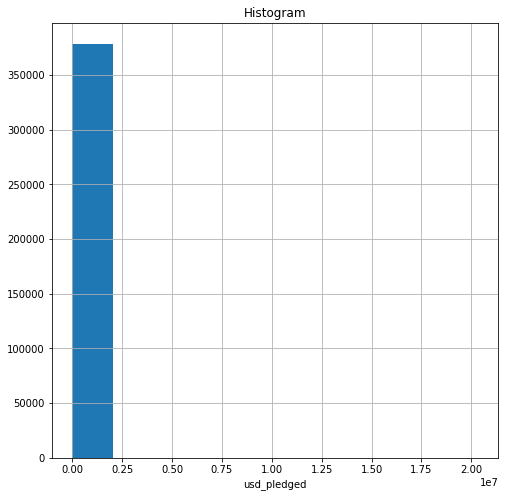

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1)

kickstarter_2018.usd_pledged.hist(ax=ax);
ax.set_title('Histogram')
ax.set_xlabel('usd_pledged')
plt.show()

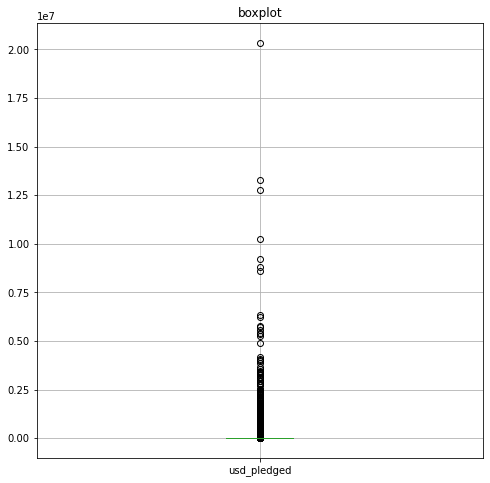

In [55]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1)

kickstarter_2018.boxplot(column='usd_pledged', ax=ax);
ax.set_title('boxplot')
plt.show()


"There are many rules of thumb for how to define an outlier but there is no
silver bullet. One rule of thumb is that any data point that is three standard 
deviations away from the mean of the same data point for all observations."

In [56]:
outliers = kickstarter_2018[
    kickstarter_2018.usd_pledged > 
    (kickstarter_2018.usd_pledged.mean() + 3 * kickstarter_2018.usd_pledged.std())
]
outliers

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000629643,ODIN: Android 'Smart' Projector to Carry in Yo...,Hardware,Technology,USD,2014-07-08,250000.0,2014-05-28 13:54:18,268192.00,successful,561,US,268192.00,268192.00,250000.00,0
1000725978,"Air Bonsai | Create your ""little star""",Product Design,Design,USD,2016-03-01,80000.0,2016-01-21 12:18:00,843743.00,successful,3784,US,843743.00,843743.00,80000.00,0
1001502333,Pimax: The World's First 8K VR Headset,Hardware,Technology,USD,2017-11-03,200000.0,2017-09-19 19:02:23,4236618.49,successful,5946,US,608194.00,4236618.49,200000.00,0
1003182869,RinseKit: The Revolutionary Portable Shower,Gadgets,Technology,USD,2016-06-03,30000.0,2016-05-04 19:27:57,396299.00,successful,2412,US,396299.00,396299.00,30000.00,0
1006008989,War for the Overworld,Video Games,Games,GBP,2013-01-03,150000.0,2012-11-29 19:11:23,211371.50,successful,8351,GB,338527.51,338589.87,240280.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994834878,KP Duffle - The Ultimate Travel Bag,Product Design,Design,USD,2016-03-04,15000.0,2016-01-19 17:00:36,624474.00,successful,3478,US,624474.00,624474.00,15000.00,0
995248054,LYFE - Set your plants free,Product Design,Design,USD,2016-07-01,80000.0,2016-06-01 18:53:37,328579.00,successful,1203,US,328579.00,328579.00,80000.00,0
995551135,Infinity: Battlescape,Video Games,Games,USD,2015-11-20,300000.0,2015-10-21 13:34:08,332620.81,successful,5828,US,332620.81,332620.81,300000.00,0


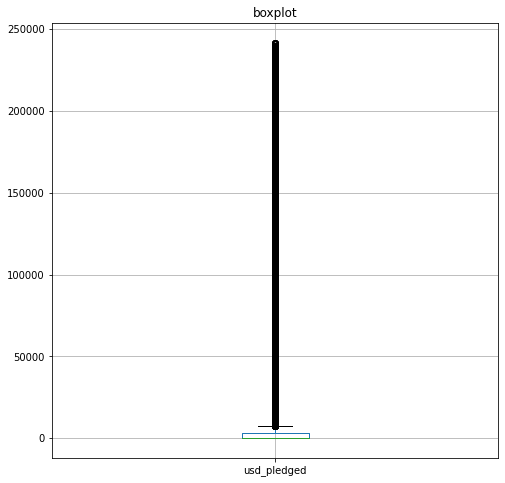

In [57]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1)

kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged', ax=ax);
ax.set_title('boxplot')
plt.show()

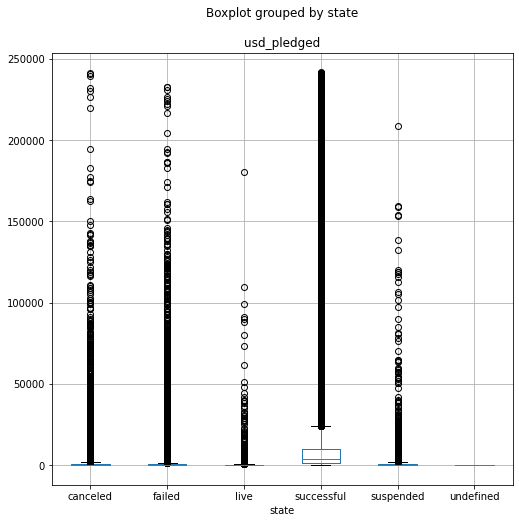

In [58]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1)
kickstarter_2018.drop(outliers.index).boxplot(
    column='usd_pledged', by='state', ax=ax);
plt.show()

Analizar outliers por categorías

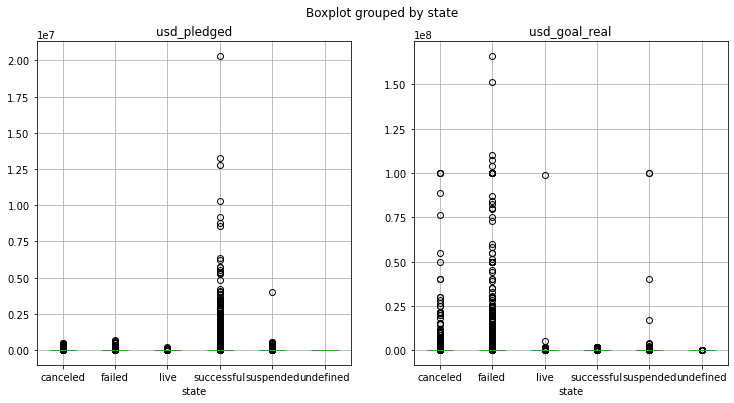

In [59]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)
kickstarter_2018.boxplot(column='usd_pledged',by='state', ax=ax1);

ax2 = plt.subplot(1, 2, 2)
kickstarter_2018.boxplot(column='usd_goal_real',by='state', ax=ax2);
plt.show()

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

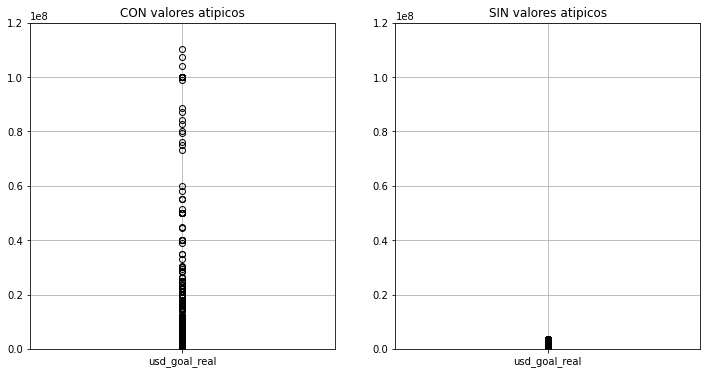

In [60]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)
kickstarter_2018.boxplot(column='usd_goal_real', ax=ax1);
ax1.set_title('CON valores atipicos')
ax1.set_ylim((0, 1.2e8))

ax2 = plt.subplot(1, 2, 2)
kickstarter_2018[
    kickstarter_2018.usd_goal_real <=
    (kickstarter_2018.usd_goal_real.mean() + 3 * kickstarter_2018.usd_goal_real.std())
].boxplot(column='usd_goal_real', ax=ax2);
ax2.set_title('SIN valores atipicos')
ax2.set_ylim((0, 1.2e8))
plt.show()

## 2.7. Evaluar cómo comprimir los datos 
para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la 
velocidad para leerlo que suele ser determinante a la hora de determinar el 
formato de almacenamiento.

El formato preferido es `feather` por la velocidad de carga acorde a este 
[post](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d)
Pero no tiene soporte para python 3.8+, el segundo formato es `pickle`

In [54]:
df.to_pickle('../output/ks-projects-201801-for-pandas.pickle')

## 2.8. Guardar el set de datos con un nombre informativo.


EL problema de la ingeniería de software